### initial: 29sep2022  
### revised: jul2023
-----
## NLP
#### 0. ponavljanje
#### 1. Vektorizacija
#### 2. Obrada dataseta
#### 3. Treniranje osnovnih modela
#### 4. Spremanje, loading i deployanje modela putem API-ja
#### 5. Conversational AI - Basic chatbot(s)

In [1]:
# import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import spacy

import gensim
# import fasttext


2023-07-24 09:43:45.022947: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-24 09:43:45.034698: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 09:43:45.126671: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 09:43:45.127597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 09:43:45.632050: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

### 0. Ponavljanje 
- Libraries: 
    - **NLTK** (word_tokenize, sent_tokenize, PorterStemmer, FreqDist, ...)
    - **TextBlob** (.correct(), .words)
    - https://www.nltk.org/book/ch02.html
    - https://textblob.readthedocs.io/en/dev/
    - https://www.analyticsvidhya.com/blog/2021/10/making-natural-language-processing-easy-with-textblob/ 
    - ...
- NLP Terminologija: corpus, tokenizacija, stopwords, korjenovanje, POS tagging, lematizacija, …
- Procesi: 
    - EDA (frekvencije riječi, gustoća rečenica, distribucija kroz dataset, izrada WordClouda, …), 
    - Feature Engineering (vektorizacija)
- ...

-----------------
#### 1.
- Što je vektorizacija? 
    - Pretvaranje tokena, rečenica, dokumenata u vektorske reprezentacije, prigodne kao input algoritmima strojnog učenja 

- Bag-of-words
- One-hot encoding
- ...

In [2]:
text = '''Lipik is a town in western Slavonia, in the Požega-Slavonia County of northeastern Croatia. 
It is known for its spas, mineral water and Lipizzaner stables. 
Lipik was occupied by Ottoman forces along with several other cities in Slavonia until its liberation in 1691. 
In 1773, the warm waters of Lipik were described favorably by a Varaždin doctor. 
It continued to be used as a treatment spa for over a century, and in 1872, the first hotel was opened in the town. 
By 1920 the number of hotels grew to six. Spa treatment is still the major focus of economy for the town. 
In the late 19th and early 20th century, Lipik was part of the Požega County of the Kingdom of Croatia-Slavonia.
'''


corpus = text.split(' ')
print(corpus)


# bez interpunkcija
import string
corpus = text.translate(str.maketrans('', '', string.punctuation)).split(' ')
print(corpus)


VOCAB = len(corpus)
print(VOCAB)

['Lipik', 'is', 'a', 'town', 'in', 'western', 'Slavonia,', 'in', 'the', 'Požega-Slavonia', 'County', 'of', 'northeastern', 'Croatia.', '\nIt', 'is', 'known', 'for', 'its', 'spas,', 'mineral', 'water', 'and', 'Lipizzaner', 'stables.', '\nLipik', 'was', 'occupied', 'by', 'Ottoman', 'forces', 'along', 'with', 'several', 'other', 'cities', 'in', 'Slavonia', 'until', 'its', 'liberation', 'in', '1691.', '\nIn', '1773,', 'the', 'warm', 'waters', 'of', 'Lipik', 'were', 'described', 'favorably', 'by', 'a', 'Varaždin', 'doctor.', '\nIt', 'continued', 'to', 'be', 'used', 'as', 'a', 'treatment', 'spa', 'for', 'over', 'a', 'century,', 'and', 'in', '1872,', 'the', 'first', 'hotel', 'was', 'opened', 'in', 'the', 'town.', '\nBy', '1920', 'the', 'number', 'of', 'hotels', 'grew', 'to', 'six.', 'Spa', 'treatment', 'is', 'still', 'the', 'major', 'focus', 'of', 'economy', 'for', 'the', 'town.', '\nIn', 'the', 'late', '19th', 'and', 'early', '20th', 'century,', 'Lipik', 'was', 'part', 'of', 'the', 'Požega',

In [3]:
sents = text.split('.')
print(sents)


frekvencije = {}

for sent in sents:
    tokens = sent.split(' ')
    for token in tokens:
        token = token.strip().lower()
        if token not in frekvencije.keys():
            frekvencije[token] = 1
        else:
            frekvencije[token] += 1
            
frekvencije

['Lipik is a town in western Slavonia, in the Požega-Slavonia County of northeastern Croatia', ' \nIt is known for its spas, mineral water and Lipizzaner stables', ' \nLipik was occupied by Ottoman forces along with several other cities in Slavonia until its liberation in 1691', ' \nIn 1773, the warm waters of Lipik were described favorably by a Varaždin doctor', ' \nIt continued to be used as a treatment spa for over a century, and in 1872, the first hotel was opened in the town', ' \nBy 1920 the number of hotels grew to six', ' Spa treatment is still the major focus of economy for the town', ' \nIn the late 19th and early 20th century, Lipik was part of the Požega County of the Kingdom of Croatia-Slavonia', '\n']


{'lipik': 4,
 'is': 3,
 'a': 4,
 'town': 3,
 'in': 8,
 'western': 1,
 'slavonia,': 1,
 'the': 10,
 'požega-slavonia': 1,
 'county': 2,
 'of': 7,
 'northeastern': 1,
 'croatia': 1,
 '': 8,
 'it': 2,
 'known': 1,
 'for': 3,
 'its': 2,
 'spas,': 1,
 'mineral': 1,
 'water': 1,
 'and': 3,
 'lipizzaner': 1,
 'stables': 1,
 'was': 3,
 'occupied': 1,
 'by': 3,
 'ottoman': 1,
 'forces': 1,
 'along': 1,
 'with': 1,
 'several': 1,
 'other': 1,
 'cities': 1,
 'slavonia': 1,
 'until': 1,
 'liberation': 1,
 '1691': 1,
 '1773,': 1,
 'warm': 1,
 'waters': 1,
 'were': 1,
 'described': 1,
 'favorably': 1,
 'varaždin': 1,
 'doctor': 1,
 'continued': 1,
 'to': 2,
 'be': 1,
 'used': 1,
 'as': 1,
 'treatment': 2,
 'spa': 2,
 'over': 1,
 'century,': 2,
 '1872,': 1,
 'first': 1,
 'hotel': 1,
 'opened': 1,
 '1920': 1,
 'number': 1,
 'hotels': 1,
 'grew': 1,
 'six': 1,
 'still': 1,
 'major': 1,
 'focus': 1,
 'economy': 1,
 'late': 1,
 '19th': 1,
 'early': 1,
 '20th': 1,
 'part': 1,
 'požega': 1,
 'kingdom': 1,


In [4]:
### Vektorske reprezentacije riječi:

vektori = []
for sent in sents:
    r_vector = []
    tokens = [t.strip().lower() for t in sent.split(' ')]
    for rijec in corpus:
        if rijec in tokens:
            r_vector.append(1)
        else:
            r_vector.append(0)
    vektori.append(r_vector)
    
    
print(len(vektori))
### zašto 9?
for i in vektori:
    print(len(i))
    ### zašto 122?

print(vektori[0])



vektori = np.asarray(vektori)

9
122
122
122
122
122
122
122
122
122
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]


- Frequency vektori, 
    - https://towardsdatascience.com/the-magic-behind-embedding-models-part-1-974d539f21fd
    - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- One-hot vektori 
    - One-hot vektori su pogodni za prikazivanje pojedinih tokena, kao i za prikaz cijelih rečenica ili dokumenata
    - https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- bez korištenja "stopwordsa"
- **problemi?**
    - "sparse vektori" - previše nula
    - memorijski zahtjevni
    - imaju problem s promijenjenim redom u rečenici
    - ne računaju na semantičku distribuciju, tj uzorkovanost teksta na temelju njegovog značenja
-------------
- TF-IDF
    - na logaritamskoj skali računa koje riječi se pojavljuju rjeđe, a koje češće te "izjednačuje" njihove vrijednosti tako da rjeđima daje veću "težinu"

- https://machinelearningmastery.com/gentle-introduction-bag-words-model/ 

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(sents)

tokenizer.index_word

tokenizer.texts_to_matrix(sents, mode="tfidf")

array([[0.        , 0.82667857, 1.55141507, 0.91629073, 1.02961942,
        1.178655  , 1.99563638, 1.178655  , 1.178655  , 0.        ,
        0.        , 0.        , 0.        , 1.38629436, 1.38629436,
        1.38629436, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.70474809, 1.70474809, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
   

------------------------------
### bolje(novije) opcije - Word2vec algoritmi
- https://arxiv.org/pdf/1301.3781.pdf 
- **CBOW**
- **Skip-gram**

![cbow&skip-gram](data/1_HmmFCZpKk3i4EvMYZ855tg.png)

- najpoznatiji algoritmi za treniranje "word embeddinga", tj vektorskih značajki
    - neuronske mreže od dva layera
    - input je korpus 
    - output je set vektora
    
- skip-gram koristi riječ kako bi predvidio "target" context.
    - vektori na izlazu iz skip-grama jako dobro hvataju semantičke relacije između riječi
    - ![cbow&skip-gram](data/1_jpnKO5X0Ii8PVdQYFO2z1Q.png)

- CBOW koristi kontekst kako bi predvidio "target" riječ
    - svi primjeri s target riječima su feedani u mrežu
    - prosjek vrijednosti u hidden layeru će biti vektor koji predstavlja našu target riječ
---------------
- Primjer: "Lipik je divan grad"
        - U skip-gramu bi input bio divan, a output: 'Lipik', 'je', 'grad'
        - kod CBOW-a bi input bio 'Lipik', 'je', 'grad', a on s određenom vjerojatnosti vraća target riječi, među kojima je "divan"

- https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314
- https://machinelearningmastery.com/develop-word-embeddings-python-gensim/  
- https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92 (+ T-SNE)
- https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8 - kako od nule napraviti svoje embeddinge pomoću 2-slojne Neuronske mreže

### Libraryji koji se koriste za izradu Word2vec reprezentacija teksta:
- gensim (https://radimrehurek.com/gensim/)
- fasttext (https://fasttext.cc/)
- ...

In [6]:
import gensim

print(text)

Lipik is a town in western Slavonia, in the Požega-Slavonia County of northeastern Croatia. 
It is known for its spas, mineral water and Lipizzaner stables. 
Lipik was occupied by Ottoman forces along with several other cities in Slavonia until its liberation in 1691. 
In 1773, the warm waters of Lipik were described favorably by a Varaždin doctor. 
It continued to be used as a treatment spa for over a century, and in 1872, the first hotel was opened in the town. 
By 1920 the number of hotels grew to six. Spa treatment is still the major focus of economy for the town. 
In the late 19th and early 20th century, Lipik was part of the Požega County of the Kingdom of Croatia-Slavonia.



In [7]:
### 1. kreiramo korpus tekstova/rečenica/tokena

gensim_corpus = [[
    token for token in sent.strip().lower().split() if len(sent) > 0
    ] for sent in text.split('.')]
import pprint
pprint.pprint(gensim_corpus)


# sentences = MyCorpus()
# model = gensim.models.Word2Vec(sentences=gensim_corpus)

[['lipik',
  'is',
  'a',
  'town',
  'in',
  'western',
  'slavonia,',
  'in',
  'the',
  'požega-slavonia',
  'county',
  'of',
  'northeastern',
  'croatia'],
 ['it',
  'is',
  'known',
  'for',
  'its',
  'spas,',
  'mineral',
  'water',
  'and',
  'lipizzaner',
  'stables'],
 ['lipik',
  'was',
  'occupied',
  'by',
  'ottoman',
  'forces',
  'along',
  'with',
  'several',
  'other',
  'cities',
  'in',
  'slavonia',
  'until',
  'its',
  'liberation',
  'in',
  '1691'],
 ['in',
  '1773,',
  'the',
  'warm',
  'waters',
  'of',
  'lipik',
  'were',
  'described',
  'favorably',
  'by',
  'a',
  'varaždin',
  'doctor'],
 ['it',
  'continued',
  'to',
  'be',
  'used',
  'as',
  'a',
  'treatment',
  'spa',
  'for',
  'over',
  'a',
  'century,',
  'and',
  'in',
  '1872,',
  'the',
  'first',
  'hotel',
  'was',
  'opened',
  'in',
  'the',
  'town'],
 ['by', '1920', 'the', 'number', 'of', 'hotels', 'grew', 'to', 'six'],
 ['spa',
  'treatment',
  'is',
  'still',
  'the',
  'major

In [8]:
### 2. kreiramo rječnik - on sadrži sve moguće riječi koje će naš pipeline znati

from gensim import corpora

dictionary = corpora.Dictionary(gensim_corpus)
print(dictionary)

Dictionary<75 unique tokens: ['a', 'county', 'croatia', 'in', 'is']...>


In [9]:
### 3. s obzirom da imamo 75 unique tokena u rječniku, svaki token će dobiti unique id od 0 do 74

dictionary.token2id

{'a': 0,
 'county': 1,
 'croatia': 2,
 'in': 3,
 'is': 4,
 'lipik': 5,
 'northeastern': 6,
 'of': 7,
 'požega-slavonia': 8,
 'slavonia,': 9,
 'the': 10,
 'town': 11,
 'western': 12,
 'and': 13,
 'for': 14,
 'it': 15,
 'its': 16,
 'known': 17,
 'lipizzaner': 18,
 'mineral': 19,
 'spas,': 20,
 'stables': 21,
 'water': 22,
 '1691': 23,
 'along': 24,
 'by': 25,
 'cities': 26,
 'forces': 27,
 'liberation': 28,
 'occupied': 29,
 'other': 30,
 'ottoman': 31,
 'several': 32,
 'slavonia': 33,
 'until': 34,
 'was': 35,
 'with': 36,
 '1773,': 37,
 'described': 38,
 'doctor': 39,
 'favorably': 40,
 'varaždin': 41,
 'warm': 42,
 'waters': 43,
 'were': 44,
 '1872,': 45,
 'as': 46,
 'be': 47,
 'century,': 48,
 'continued': 49,
 'first': 50,
 'hotel': 51,
 'opened': 52,
 'over': 53,
 'spa': 54,
 'to': 55,
 'treatment': 56,
 'used': 57,
 '1920': 58,
 'grew': 59,
 'hotels': 60,
 'number': 61,
 'six': 62,
 'economy': 63,
 'focus': 64,
 'major': 65,
 'still': 66,
 '19th': 67,
 '20th': 68,
 'croatia-slavon

In [10]:
### Instanciramo i treniramo model kojem su input liste rečenice koje sadrže liste tokena (matrice)

model = gensim.models.Word2Vec(
    sentences=gensim_corpus,
    vector_size=50,
    window=2,
    min_count=1,
    sg=1
)
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#training-parameters


lipik_vektor = model.wv['lipik']
print(lipik_vektor)


[ 1.5633479e-02 -1.9057216e-02 -3.8956242e-04  6.9697211e-03
 -1.8966158e-03  1.6716687e-02  1.8064957e-02  1.3147244e-02
 -1.4703224e-03  1.5327264e-02 -1.7064469e-02  6.3621202e-03
 -9.1954032e-03 -1.0130046e-02  7.1061128e-03  1.0844880e-02
  1.5611086e-02 -1.1446351e-02  1.4811359e-02  1.3211681e-02
 -7.3584621e-03 -1.7435730e-02  1.0976587e-02  1.3013868e-02
 -1.5519126e-03 -1.3366995e-02 -1.4210166e-02 -4.9501397e-03
  1.0223595e-02 -7.2960043e-03 -1.8780116e-02  7.6254578e-03
  9.7863991e-03 -1.2804915e-02  2.4098670e-03 -4.1228980e-03
  8.2528633e-05 -1.9813180e-02  5.3620045e-03 -9.4328541e-03
  2.2384173e-03 -3.1831160e-03  4.3832562e-03 -1.5734375e-02
 -5.3783124e-03  5.3236429e-03  1.0719043e-02 -4.8546488e-03
 -1.8958323e-02  8.9947414e-03]


In [11]:
model.wv.most_similar('lipik')

[('požega', 0.2986449897289276),
 ('1920', 0.2587531805038452),
 ('cities', 0.2282520830631256),
 ('number', 0.20954549312591553),
 ('water', 0.203342467546463),
 ('spa', 0.19088174402713776),
 ('six', 0.17562344670295715),
 ('spas,', 0.16705889999866486),
 ('major', 0.16560907661914825),
 ('described', 0.1529415398836136)]

In [ ]:
print(model.wv.most_similar('lipik'))

In [12]:
### Što ako tražimo riječ koja nije bila prisutna u modelu ??

print(model.wv.most_similar('village'))

KeyError: "Key 'village' not present in vocabulary"

- fasttext je razvijen 2016. u Facebooku kao ekstenzija Word2Vec algoritama 
    - razbija sve tokene na "character n-grame" (podriječi) 
    - to mu omogućuje da bolje reprezentira riječi koje nije sreo u trening datasetu
    

In [13]:
from gensim.models import FastText # (=character n-gram algoritam)

In [ ]:
### Spremanje modela

# model.wv.save_word2vec_format('model.bin')
# model.wv.save_word2vec_format('model.txt', binary=False)


### druge vrste modela:
# 1. LDA
    # - https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation#:~:text=In%20natural%20language%20processing%2C%20the,of%20the%20data%20are%20similar.
    # - https://towardsdatascience.com/nlp-extracting-the-main-topics-from-your-dataset-using-lda-in-minutes-21486f5aa925
    # - https://radimrehurek.com/gensim/auto_examples/tutorials/run_ensemblelda.html
# 2. Doc2Vec
    # https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#introducing-paragraph-vector
        # nije isto što i prosjek svih word2vec vektora!!
# 3. Latent Semantic Analysis
    # - https://en.wikipedia.org/wiki/Latent_semantic_analysis


<class 'list'>


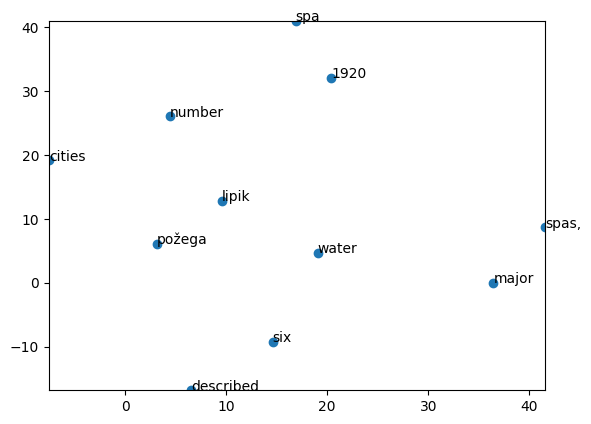

In [14]:
### primjer vizualizacije ###

from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word, size):
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.wv.most_similar(word)
    print(type(close_words))
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

display_closestwords_tsnescatterplot(model, 'lipik', 50) 

------------------------

- **Transfer learning**
    - ekstrakcija "znanja" iz nekog drugog izvora i primjena na naš problem/dataset
        - znanje = značajke
        - znanje = data
        - znanje = metadata u ML-u
    - omogućuje primjenu istreniranih modela na drugačiji, sličan ili isti problem (ovisno o zadatku kojeg rješavamo)
    - https://ruder.io/state-of-transfer-learning-in-nlp/ 

    - najpoznatiji Word2Vec modeli: 
        - https://nlp.stanford.edu/projects/glove/ 
        - GoogleNews-vectors-negative300.bin (https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz / https://figshare.com/articles/dataset/GoogleNews-vectors-negative300_bin/6007688)
    
    - današnji SOTA nlp modeli:
        - transformeri (Bert (bertić), GPT, XLNet)
        - https://www.analyticsvidhya.com/blog/2019/06/understanding-transformers-nlp-state-of-the-art-models/ 

In [15]:
import spacy
# python -m spacy download en_core_web_lg # md # sm
nlp = spacy.load("en_core_web_lg")


### AKO NE PROĐE:
## aktivirati environment i upisati naredbu:
    # "python -m spacy download en_core_web_lg"

In [16]:
### uzimamo tekst o lipiku s početka
doc = nlp(text)

In [17]:
print(type(doc))

<class 'spacy.tokens.doc.Doc'>


In [18]:
sentences = list(doc.sents)
print(sentences)

[Lipik is a town in western Slavonia, in the Požega-Slavonia County of northeastern Croatia. 
, It is known for its spas, mineral water and Lipizzaner stables. 
, Lipik was occupied by Ottoman forces along with several other cities in Slavonia until its liberation in 1691. 
, In 1773, the warm waters of Lipik were described favorably by a Varaždin doctor. 
, It continued to be used as a treatment spa for over a century, and in 1872, the first hotel was opened in the town. 
, By 1920 the number of hotels grew to six., Spa treatment is still the major focus of economy for the town. 
, In the late 19th and early 20th century, Lipik was part of the Požega County of the Kingdom of Croatia-Slavonia.
]


In [19]:
### spacy omogućuje niz lingvističkih podataka po tokenu, rečenici ili cijelim dokumentima

for token in doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))

Lipik	0	Lipik	False	False	Xxxxx	PROPN	NNP
is	6	be	False	False	xx	AUX	VBZ
a	9	a	False	False	x	DET	DT
town	11	town	False	False	xxxx	NOUN	NN
in	16	in	False	False	xx	ADP	IN
western	19	western	False	False	xxxx	ADJ	JJ
Slavonia	27	Slavonia	False	False	Xxxxx	PROPN	NNP
,	35	,	True	False	,	PUNCT	,
in	37	in	False	False	xx	ADP	IN
the	40	the	False	False	xxx	DET	DT
Požega	44	Požega	False	False	Xxxxx	PROPN	NNP
-	50	-	True	False	-	PUNCT	HYPH
Slavonia	51	Slavonia	False	False	Xxxxx	PROPN	NNP
County	60	County	False	False	Xxxxx	PROPN	NNP
of	67	of	False	False	xx	ADP	IN
northeastern	70	northeastern	False	False	xxxx	ADJ	JJ
Croatia	83	Croatia	False	False	Xxxxx	PROPN	NNP
.	90	.	True	False	.	PUNCT	.

	92	
	False	True	
	SPACE	_SP
It	93	it	False	False	Xx	PRON	PRP
is	96	be	False	False	xx	AUX	VBZ
known	99	know	False	False	xxxx	VERB	VBN
for	105	for	False	False	xxx	ADP	IN
its	109	its	False	False	xxx	PRON	PRP$
spas	113	spa	False	False	xxxx	NOUN	NNS
,	117	,	True	False	,	PUNCT	,
mineral	119	mineral	False	False	xxxx	NOUN

In [20]:
### VEKTORI 
vectors = []
for sent in doc.sents:
    s = []
    for token in sent:
        # print(token.vector.shape)
        if token.is_oov:
            print(token.text)
            token.vector == np.ones((300,), dtype=np.float32)
        vector = token.vector
        s.append(vector)
    vectors.append(s)

# print(len(vectors[0][5]))
# print(vectors[0][5])

Lipik




Lipik


Lipik






Lipik




In [21]:
print(vectors[5])

[array([ -9.4583  ,  -8.4392  ,  -4.412   ,   0.67915 ,  10.209   ,
         2.8724  ,  -7.5497  ,  -8.3654  ,  -5.8138  ,   3.8518  ,
        -7.4806  ,   6.8127  ,   1.0853  ,  18.048   ,   1.9247  ,
        10.429   ,  -2.8086  ,   6.5946  ,  14.913   ,  -1.5563  ,
        -3.9339  ,  18.006   ,   1.8144  ,  -1.3887  ,  -1.7682  ,
         9.1792  ,   3.1265  ,  15.772   ,  -0.45245 ,  12.635   ,
        -4.0574  , -17.736   ,   9.7979  ,  11.755   ,  -7.7121  ,
         8.0524  ,   5.1624  ,  -1.4621  ,   0.042125,   0.1572  ,
        -0.8287  ,   2.8882  , -12.416   ,  -4.2017  ,  -5.9787  ,
        -5.537   ,  -7.2038  ,   5.9793  ,  10.449   ,   9.176   ,
         1.3994  ,   3.7641  ,   0.10094 ,  -8.6087  ,   3.2638  ,
         6.4365  ,  -3.1044  ,  -9.2767  ,   7.9803  ,   4.2876  ,
        -5.9272  ,  -6.6345  ,   2.9835  ,  10.538   ,  -4.657   ,
        15.891   ,  10.24    ,   3.9605  ,  -6.7846  ,   5.0964  ,
        -5.9124  ,   0.27239 ,  -2.2505  ,  -5.5978  ,  15.13

In [22]:
### pretrained NER oznake

from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)


### Semantic similarity 

- Koliko su dvije riječi međusobno slične/različite? 
- Koje su sve moguće metode računanja sličnosti među riječima? 

-----------------
- Koji bi bili načini računanja sličnosti između dva dokumenta?

In [23]:
# https://www.sciencedirect.com/topics/computer-science/cosine-similarity#:~:text=Cosine%20similarity%20measures%20the%20similarity,in%20roughly%20the%20same%20direction.&text=Thus%2C%20each%20document%20is%20an,called%20a%20term%2Dfrequency%20vector. 
# https://www.sciencedirect.com/topics/computer-science/euclidean-distance 

from scipy import spatial
def get_cosine_similarity(*word_pairs, nlp_pipeline):
    # izvor: https://towardsdatascience.com/a-little-spacy-food-for-thought-easy-to-use-nlp-framework-97cbcc81f977
    cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
    for pair in word_pairs:
        print("{} AND {}: ".format(pair[0], pair[1]), cosine_similarity(nlp_pipeline.vocab[pair[0]].vector, nlp_pipeline.vocab[pair[1]].vector))
    # print("apple vs banana: ", cosine_similarity(nlp.vocab["apple"].vector, nlp.vocab["banana"].vector))
    # print("car vs banana: ", cosine_similarity(nlp.vocab["car"].vector, nlp.vocab["banana"].vector))
    # print("car vs bus: ", cosine_similarity(nlp.vocab["car"].vector, nlp.vocab["bus"].vector))
    # print("tomatos vs banana: ", cosine_similarity(nlp.vocab["tomatos"].vector, nlp.vocab["banana"].vector))
    # print("tomatos vs cucumber: ", cosine_similarity(nlp.vocab["tomatos"].vector, nlp.vocab["cucumber"].vector))


get_cosine_similarity(
        ("apple", "banana"),
        ("Slavonija", "Croatia"),
        ("spa", "water"),
        ("spa", "mineral"),
        ("water", "mineral"),
        ("Lipik", "Pakrac"),
        ("Lipik", "Croatia"),
        nlp_pipeline = nlp
    )

apple AND banana:  0.6646701097488403
Slavonija AND Croatia:  1
spa AND water:  0.17144551873207092
spa AND mineral:  0.15282107889652252
water AND mineral:  0.5340303778648376
Lipik AND Pakrac:  1
Lipik AND Croatia:  1


/home/dario/Projects/lipik-nlp/venv-py310/lib/python3.10/site-packages/scipy/spatial/distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [24]:
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

man = nlp.vocab["man"].vector
woman = nlp.vocab["woman"].vector
queen = nlp.vocab["queen"].vector
king = nlp.vocab["king"].vector
calculated_king = man - woman + queen
print("similarity between our calculated king vector and real king vector:", cosine_similarity(calculated_king, king))

similarity between our calculated king vector and real king vector: 0.6300731301307678


In [ ]:
### Spacy nema ".most_similar() ili .similarity() metodu koja iz skupa podataka izvlači udaljenost točaka po Euklidu ili kosinusu"


### ne radi - need to fix def :) 
def get_most_similar(nlp_pipeline, word, limit=7):
    word = nlp_pipeline.vocab[str(word)]
    queries = [
        w for w in word.vocab 
        if w.is_lower == word.is_lower and w.prob >= -15 and np.count_nonzero(w.vector)
    ]
    print(queries)

    by_similarity = sorted(queries, key=lambda w: word.similarity(w), reverse=True)
    return [(w.lower_,w.similarity(word)) for w in by_similarity[:limit+1] if w.lower_ != word.lower_]

# get_most_similar(nlp, "Lipik")
# get_most_similar(nlp, "Croatia")
# get_most_similar(nlp, "Slavonija")
# get_most_similar(nlp, "Lipizzaner")
get_most_similar(nlp, "man")

In [25]:
from gensim.models import KeyedVectors
import os

Word2Vec_embeddings = os.path.join(os.getcwd(), 'models', 'GoogleNews-vectors-negative300.bin')
w2v_model = KeyedVectors.load_word2vec_format(Word2Vec_embeddings, binary=True)

embeddings = []
for t in tokens:
    try:
        # https://radimrehurek.com/gensim_3.8.3/models/keyedvectors.html#gensim.models.keyedvectors.Word2VecKeyedVectors
        embeddings.append(w2v_model.get_vector(t)) 
    except KeyError:
        # embeddings.append(get_placeholder_vector(300))
        continue


# print(cosine_similarity(calculated_king, king))

In [26]:
print(cosine_similarity(calculated_king, king))

0.6300731301307678


In [27]:
### Using GloVe (stanford university)
# https://nlp.stanford.edu/projects/glove/

filename = 'glove.6B.50d.txt'

GloVe_embeddings = os.path.join(os.getcwd(), 'models', 'glove.6B', filename)

embeddings_index = {}
with open(GloVe_embeddings, "r", encoding="utf-8") as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        # print(coefs.shape)
        vector_size = coefs.shape[0]
        embeddings_index[word.strip().lower()] = coefs
    print("Loaded %s word vectors." % len(embeddings_index))

tokens = text.split(' ')
embeddings = []

for token in tokens:
    t = token.strip().lower()
    try:
        embeddings.append(embeddings_index[t])
    except KeyError:
        # embeddings.append(get_placeholder_vector(vector_size))
        continue

Loaded 400000 word vectors.


-----------------------------------------------------------

### TASKS (if the semantic similarity and unsupervised approach to text analysis has not been clear): 
##### Textual (dis)similarity 
1. Given a new random article, to which article from an existing dataset is it most similar to?
2. Performing a cluster analysis, divide a dataset into n clusters (use your ds skills and elbow method to decide which one is the best) -> define semantic classes of those articles
3. Given a new random article, what class does this article belong to ? 

##### How-To:
1. Get 1000 wikipedia articles (choose a topic about an AI field, or 3 AI fields)
- use web scraping, no existing Kaggle or wikipedia dataset :) 

2. Model training
    1. Don't train a model, use TF-IDF, CBOW, Jaccard similarity and Levenshtein distance (yes)
    2. Train an unsupervised model on all the data and start using cosine similarity between both words and documents
    3. Perform topic modelling with gensim --> use this data to both classify texts and perform similarity
    4. Use TextRank or Rake to perform "keyword extraction" --> Does this work better on your dataset ?
- see https://www.analyticsvidhya.com/blog/2022/01/four-of-the-easiest-and-most-effective-methods-of-keyword-extraction-from-a-single-text-using-python/ for kw extraction info